# ADVANCED ANALISYS (ANÁLISIS AVANZADOS)

El objetivo de esta sección es realizar análisis de alto nivel, aplicando técnicas de EDA avanzadas, cómo PCA o Clusterización.

<br>

Se encarga de responder preguntas como:
- ¿Existen grupos de vinos definidos por ciertas variables?
- ¿Existe una buena combinación de variables que sea capaza de describir a los mejores vinos?
- ¿Qué variables son las más importantes para describir a un vino?

<br>

---

## Configuración General

1. Carga de librerías.
2. Seteo de estilos del notebook.
3. Ingesta del dataset.

In [ ]:
import sys
import os
import statistics

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



sys.path.append(os.path.abspath(os.path.join('..', '..', 'src', 'utils')))
import utils as ut

In [2]:
# Seteo de estilos
plt.style.use("ggplot")
sns.set_palette("viridis")
plt.rcParams["figure.figsize"] = (9,6)

In [ ]:
wines = pd.read_csv("../../src/data/transformed/wines_clean.csv")
pd.set_option('display.max_columns', None)
wines.head(10)

,wine_link,name,year,winery,rating,rating_qty,price,body,tannis,sweetness,acidity,style,alcohol,image,ageing,black fruit,citrus,dried fruit,earthy,floral,oaky,red fruit,spices,tree fruit,tropical,vegetal,yeasty,any junk food will do,aperitif,appetizers and snacks,beef,blue cheese,cured meat,"game (deer, venison)",goat's milk cheese,lamb,lean fish,mature and hard cheese,mild and soft cheese,mushrooms,pasta,pork,poultry,"rich fish (salmon, tuna etc)",shellfish,spicy food,veal,vegetarian,Albariño,Barbera,Bonarda,Béquignol Noir,Cabernet Franc,Cabernet Sauvignon,Cereza,Chardonnay,Chenin Blanc,Criolla Grande,Garnacha,Gewürztraminer,Grenache,Grüner Veltliner,Malbec,Malvasia,Marsanne,Mencia,Merlot,Moscatel,Mourvedre,Pais,Pedro Giménez,Pedro Ximenez,Petit Verdot,Pinot Gris,Pinot Noir,Riesling,Roussanne,Sangiovese,Sauvignon Blanc,Shiraz/Syrah,Sémillon,Tannat,Tempranillo,Torrontés,Trousseau,Verdejo,Viognier,Agrelo,Argentina,Brazil,Cafayate Valley,Calchaqui Valley,Campanha,Famatina,Gualtallary,La Consulta,La Rioja,Las Compuertas,Lujan de Cuyo,Lunlunta,Maipu,Mendoza,Paraje Altamira,Patagonia,Pedernal Valley,Perdriel,Rio Grande do Sul,Rio Negro,Salta,San Carlos,San Juan,San Rafael,Serra Gaúcha,Tulum Valley,Tunuyán,Tupungato,Uco Valley,Vale dos Vinhedos,Vista Flores
0,https://www.vivino.com/US/en/luigi-bosca-parai...,Paraiso,2020.0,Luigi Bosca,4.8,582.0,188.33,0.7343,0.5090,0.1361,0.4474,Argentinian Cabernet Sauvignon - Malbec,NaN,https://images.vivino.com/thumbs/_Bf6JTwYRpSX6...,0.0000,0.3500,0.0000,0.0000,0.1250,0.0500,0.3250,0.0500,0.1000,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,https://www.vivino.com/US/en/catena-zapata-est...,Estiba Reservada,2015.0,Catena Zapata,4.7,297.0,675.00,0.7417,0.5583,0.1434,0.5445,Argentinian Bordeaux Blend,0.140,https://images.vivino.com/thumbs/Yt464jw0QS-ug...,0.0241,0.2008,0.0080,0.0120,0.0964,0.0241,0.4378,0.0843,0.1004,0.0000,0.0,0.0040,0.0080,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,https://www.vivino.com/US/en/catena-zapata-est...,Estiba Reservada,2017.0,Catena Zapata,4.7,219.0,580.00,0.7417,0.5583,0.1434,0.5445,Argentinian Bordeaux Blend,NaN,https://images.vivino.com/thumbs/Yt464jw0QS-ug...,0.0241,0.2008,0.0080,0.0120,0.0964,0.0241,0.4378,0.0843,0.1004,0.0000,0.0,0.0040,0.0080,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,https://www.vivino.com/US/en/monteviejo-la-vio...,La Violeta,2013.0,Monteviejo,4.7,202.0,150.00,0.7306,0.4091,0.2148,0.3661,Argentinian Uco Valley Malbec Red,0.145,https://images.vivino.com/thumbs/FO-x9h3mQHSx9...,0.0061,0.2988,0.0000,0.0061,0.1585,0.0671,0.3110,0.0671,0.0671,0.0000,0.0,0.0061,0.0122,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,https://www.vivino.com/US/en/vina-cobos-cobos-...,Cobos Volturno,2018.0,Viña Cobos,4.7,198.0,399.99,0.7105,0.4563,0.2426,0.3844,Argentinian Cabernet Sauvignon - Malbec,NaN,https://images.vivino.com/thumbs/D1Mf1fYnRnage...,0.0258,0.2526,0.0103,0.0103,0.0773,0.0103,0.4433,0.0773,0.0876,0.000

In [ ]:
# Feature Selection: https://scikit-learn.org/stable/modules/feature_selection.html

### 01 | Reducción de Dimensionalidad + Clustering

---

#### Me quedaron ideas en la cabeza por hacer a continuación de esto....
###### por ejemplo: Comparativa de estilo vs región o país, Distribución por alcohol, categorizarlos por rango, y un par más

### Agrupar vinos similares basados en perfiles de sabor

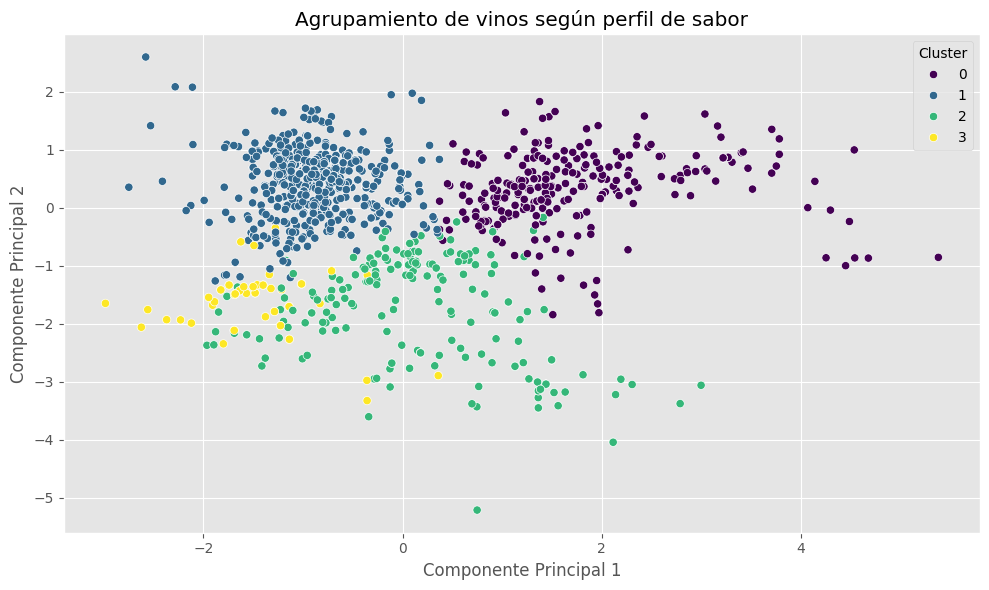

In [30]:
perfil_sabor_cols = ['body', 'tannis', 'sweetness', 'acidity']

df_sabor = wines_filtrados.dropna(subset=perfil_sabor_cols).copy()

scaler = StandardScaler()
sabor_normalizado = scaler.fit_transform(df_sabor[perfil_sabor_cols])

kmeans = KMeans(n_clusters=4, random_state=42)
df_sabor['cluster'] = kmeans.fit_predict(sabor_normalizado)

pca = PCA(n_components=2)
pca_resultado = pca.fit_transform(sabor_normalizado)

df_sabor['PCA1'] = pca_resultado[:, 0]
df_sabor['PCA2'] = pca_resultado[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sabor, x='PCA1', y='PCA2', hue='cluster', palette='viridis')
plt.title("Agrupamiento de vinos según perfil de sabor")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()



In [31]:
df_sabor[['name', 'body', 'tannis', 'sweetness', 'acidity', 'cluster']].groupby('cluster').head(5)


,name,body,tannis,sweetness,acidity,cluster
0,Paraiso,0.7343,0.5090,0.1361,0.4474,0
1,Estiba Reservada,0.7417,0.5583,0.1434,0.5445,0
2,Estiba Reservada,0.7417,0.5583,0.1434,0.5445,0
3,La Violeta,0.7306,0.4091,0.2148,0.3661,1
4,Cobos Volturno,0.7105,0.4563,0.2426,0.3844,1
5,La Violeta,0.7306,0.4091,0.2148,0.3661,1
6,Adrianna Vineyard Mundus Bacillus Terrae Malbec,0.6652,0.3627,0.2189,0.4354,1
7,Cobos Viña Cobos Malbec,0.7025,0.3888,0.2260,0.4525,1
10,Nicolás Catena Zapata,0.7443,0.4805,0.1331,0.4404,0
13,Gran Enemigo Single Vineyard Chacayes Cabernet...,0.8187,0.5464,0.1364,0.6196,0


In [32]:
maridaje_cols_presentes = [col for col in pairing_cols if col in df_sabor.columns]

maridajes_por_cluster = df_sabor.groupby('cluster')[maridaje_cols_presentes].sum()
for c in maridajes_por_cluster.index:
    print(f"\nCluster {c} - Maridajes más comunes:")
    top_maridajes = maridajes_por_cluster.loc[c].sort_values(ascending=False).head(5)
    print(top_maridajes)


Cluster 0 - Maridajes más comunes:
beef                    463.0
lamb                    456.0
poultry                 424.0
pasta                   127.0
game (deer, venison)     80.0
Name: 0, dtype: float64

Cluster 1 - Maridajes más comunes:
beef           878.0
lamb           878.0
pork           404.0
poultry         53.0
blue cheese     10.0
Name: 1, dtype: float64

Cluster 2 - Maridajes más comunes:
beef           232.0
lamb           229.0
poultry        187.0
pork           174.0
blue cheese     71.0
Name: 2, dtype: float64

Cluster 3 - Maridajes más comunes:
game (deer, venison)    62.0
poultry                 62.0
veal                    62.0
beef                    60.0
pork                     3.0
Name: 3, dtype: float64


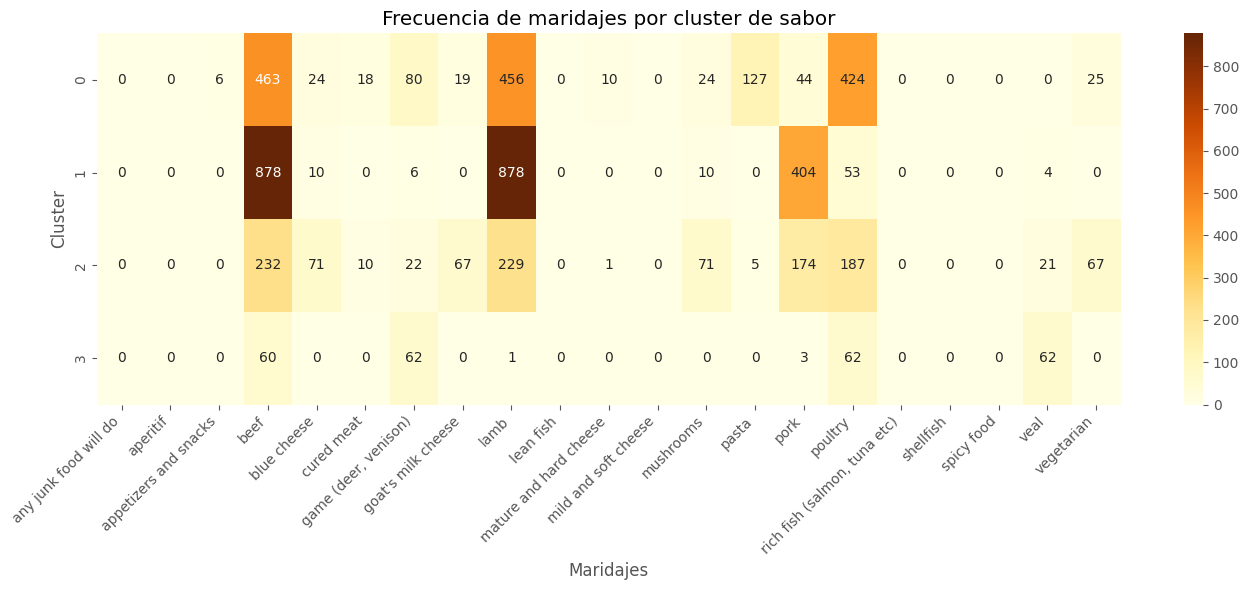

In [33]:
plt.figure(figsize=(14, 6))
sns.heatmap(maridajes_por_cluster, annot=True, cmap="YlOrBr", fmt=".0f")
plt.title("Frecuencia de maridajes por cluster de sabor")
plt.xlabel("Maridajes")
plt.ylabel("Cluster")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [34]:
uvas_presentes = [col for col in grape_cols if col in df_sabor.columns]
uvas_por_cluster = df_sabor.groupby('cluster')[uvas_presentes].sum()
for c in uvas_por_cluster.index:
    top_uva = uvas_por_cluster.loc[c].sort_values(ascending=False).head(1)
    print(f"Cluster {c} - Uva más frecuente: {top_uva.index[0]} (Cantidad: {int(top_uva.values[0])})")


Cluster 0 - Uva más frecuente: Cabernet Sauvignon (Cantidad: 338)
Cluster 1 - Uva más frecuente: Malbec (Cantidad: 865)
Cluster 2 - Uva más frecuente: Malbec (Cantidad: 132)
Cluster 3 - Uva más frecuente: Pinot Noir (Cantidad: 59)


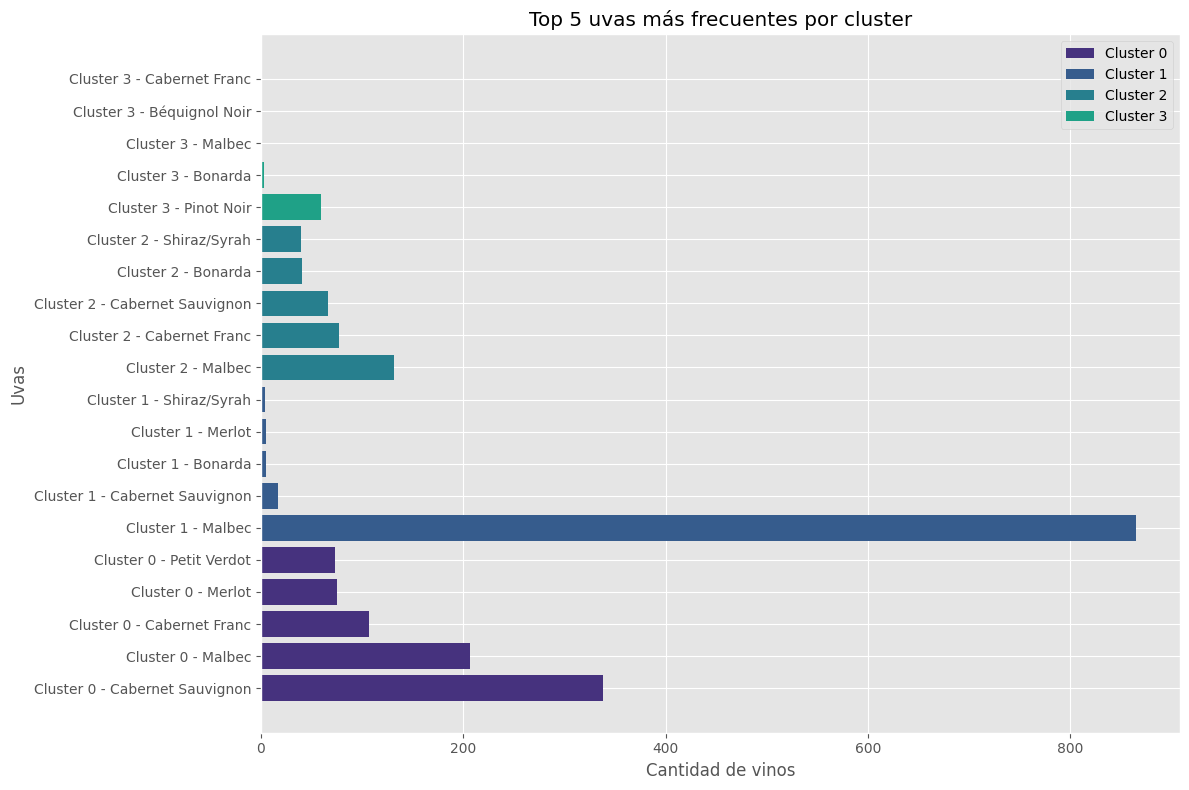

In [35]:
plt.figure(figsize=(12, 8))

for c in uvas_por_cluster.index:
    top_uvas = uvas_por_cluster.loc[c].sort_values(ascending=False).head(5)
    plt.barh(
        [f'Cluster {c} - {uva}' for uva in top_uvas.index],
        top_uvas.values,
        label=f'Cluster {c}'
    )

plt.title('Top 5 uvas más frecuentes por cluster')
plt.xlabel('Cantidad de vinos')
plt.ylabel('Uvas')
plt.legend()
plt.tight_layout()
plt.show()

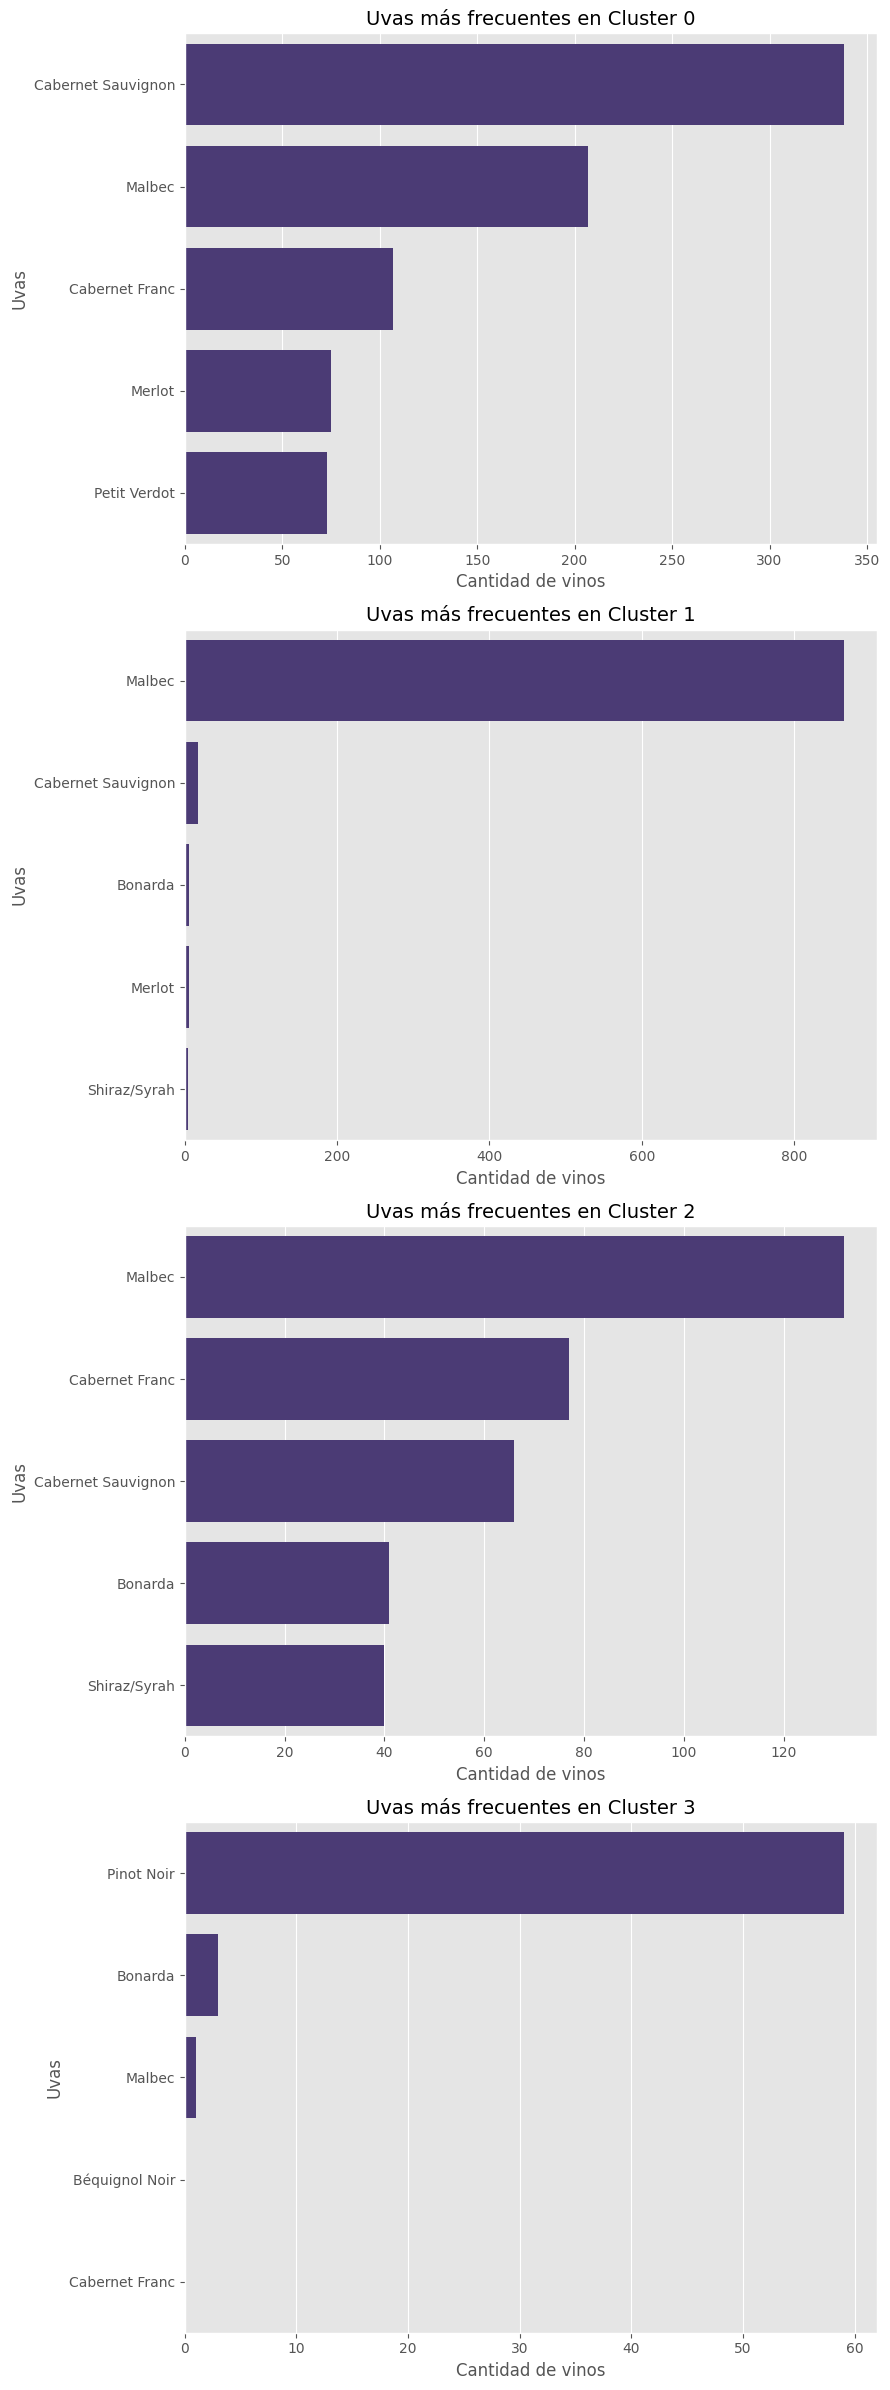

In [36]:


plt.style.use("ggplot")
sns.set_palette("viridis")
plt.rcParams["figure.figsize"] = (9, 6)

n_clusters = df_sabor['cluster'].nunique()

fig, axes = plt.subplots(n_clusters, 1, figsize=(9, 6 * n_clusters))

if n_clusters == 1:
    axes = [axes]

for cluster_id, ax in zip(range(n_clusters), axes):
    vinos_cluster = df_sabor[df_sabor['cluster'] == cluster_id]
    uvas_cluster = vinos_cluster[grape_cols].sum().sort_values(ascending=False).head(5)
    
    sns.barplot(x=uvas_cluster.values, y=uvas_cluster.index, ax=ax)
    ax.set_title(f'Uvas más frecuentes en Cluster {cluster_id}', fontsize=14)
    ax.set_xlabel("Cantidad de vinos")
    ax.set_ylabel("Uvas")

plt.tight_layout()
plt.show()



In [37]:
pairings_por_cluster = df_sabor.groupby('cluster')[pairing_cols].sum()

resumen_clusters = []

for c in uvas_por_cluster.index:
    top_uva = uvas_por_cluster.loc[c].sort_values(ascending=False).idxmax()
    top_maridajes = pairings_por_cluster.loc[c].sort_values(ascending=False).head(3)
    resumen_clusters.append({
        'Cluster': f'Cluster {c}',
        'Uva Dominante': top_uva,
        'Top Maridajes': ', '.join(top_maridajes.index)
    })

df_resumen = pd.DataFrame(resumen_clusters)
print(df_resumen)


     Cluster       Uva Dominante                        Top Maridajes
0  Cluster 0  Cabernet Sauvignon                  beef, lamb, poultry
1  Cluster 1              Malbec                     beef, lamb, pork
2  Cluster 2              Malbec                  beef, lamb, poultry
3  Cluster 3          Pinot Noir  game (deer, venison), poultry, veal
